In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.drop(columns = ['Surname','CustomerId','RowNumber'],inplace= True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [24]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [54]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics= ['accuracy'])

In [67]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8681 - loss: 0.3127 - val_accuracy: 0.8512 - val_loss: 0.3456
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.3134 - val_accuracy: 0.8494 - val_loss: 0.3491
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.3106 - val_accuracy: 0.8519 - val_loss: 0.3471
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8677 - loss: 0.3172 - val_accuracy: 0.8525 - val_loss: 0.3456
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8643 - loss: 0.3182 - val_accuracy: 0.8512 - val_loss: 0.3459
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.3068 - val_accuracy: 0.8500 - val_loss: 0.3468
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8702 - loss: 0.3097 - val_accuracy: 0.8525 - val_loss: 0.3473
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8709 - loss: 0.3109 - val_accu

In [69]:
model.layers[0].get_weights()

[array([[-0.04658448, -0.3536356 , -0.10600759,  0.22210921, -0.2816917 ,
          0.06541358,  0.3721223 , -0.03542221, -0.27244163, -0.0392253 ,
         -0.00270864],
        [ 0.6024418 ,  0.59751797,  0.49821165, -0.4166498 ,  0.023507  ,
         -0.63972956, -0.9087737 ,  0.22437267, -0.7547525 , -0.21032025,
         -0.8435403 ],
        [-0.09266309,  0.37446275,  0.04884505, -0.04698309, -0.5565519 ,
          0.05685944, -0.26126504, -0.05179479,  0.16577029, -0.0074763 ,
         -0.07166619],
        [ 0.622085  , -0.3034413 , -0.2050192 ,  0.44583642,  0.3085803 ,
         -0.13808085,  0.27319512,  1.1114299 , -0.5046329 ,  0.25331384,
          0.45494342],
        [ 0.36041775,  0.10771646, -1.0672818 ,  0.49019885, -0.6978149 ,
          0.84583646,  0.5176757 ,  1.1852584 ,  0.32023174,  1.5860667 ,
         -0.09505779],
        [ 0.14744812,  0.02922878, -0.18114829, -0.33363843, -0.24038091,
          0.851685  , -0.24905992, -0.1049321 , -0.1562326 , -0.4840712

In [71]:
model.layers[1].get_weights()

[array([[ 5.24918675e-01, -3.45817089e-01,  3.73011917e-01,
         -3.92524272e-01, -6.26493692e-01,  1.99789271e-01,
         -2.72276729e-01, -1.32001138e+00, -5.42731524e-01,
          4.18929219e-01,  5.72466142e-02],
        [-4.65337813e-01, -2.90630400e-01,  1.53244868e-01,
         -6.13883793e-01,  2.86090761e-01,  2.72041202e-01,
         -5.15365005e-02,  4.41687346e-01, -4.63004082e-01,
          2.63079613e-01, -2.46967554e-01],
        [-1.17276061e+00, -2.51771301e-01,  1.37464598e-01,
          8.18641901e-01,  1.94595590e-01,  5.97443163e-01,
          2.98151355e-02,  6.15595639e-01, -2.89269656e-01,
         -6.48383051e-03, -1.36489606e+00],
        [ 2.34119862e-01,  2.65778422e-01,  5.75333573e-02,
         -3.60789180e-01,  1.10275321e-01,  1.50925457e-01,
         -4.50648218e-01,  1.75722539e-01,  7.34088361e-01,
          3.11218739e-01,  2.27719605e-01],
        [ 1.50719970e-01, -2.74079949e-01,  4.95769173e-01,
         -8.81427705e-01,  6.46701753e-01,  

In [72]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [73]:
y_pred = np.where(y_log>0.5,1,0)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [75]:
import matplotlib.pyplot as plt

In [76]:
history.history

{'accuracy': [0.8687499761581421,
  0.8704687356948853,
  0.8693749904632568,
  0.8685937523841858,
  0.8689062595367432,
  0.8682812452316284,
  0.8693749904632568,
  0.8693749904632568,
  0.8707812428474426,
  0.870312511920929,
  0.8693749904632568,
  0.8687499761581421,
  0.8700000047683716,
  0.8687499761581421,
  0.8695312738418579,
  0.8696874976158142,
  0.8696874976158142,
  0.8692187666893005,
  0.8681250214576721,
  0.8698437213897705,
  0.8704687356948853,
  0.8690624833106995,
  0.8695312738418579,
  0.8709375262260437,
  0.8698437213897705,
  0.8687499761581421,
  0.8696874976158142,
  0.8706250190734863,
  0.8700000047683716,
  0.8692187666893005,
  0.8682812452316284,
  0.8695312738418579,
  0.87109375,
  0.8695312738418579,
  0.8695312738418579,
  0.8698437213897705,
  0.8676562309265137,
  0.87109375,
  0.870312511920929,
  0.8692187666893005,
  0.8692187666893005,
  0.8714062571525574,
  0.8696874976158142,
  0.8696874976158142,
  0.8687499761581421,
  0.869218766689

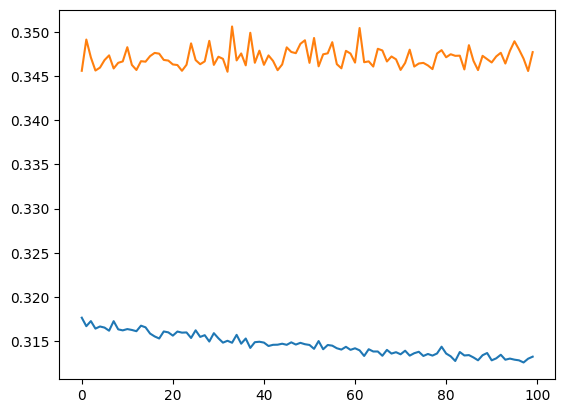

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

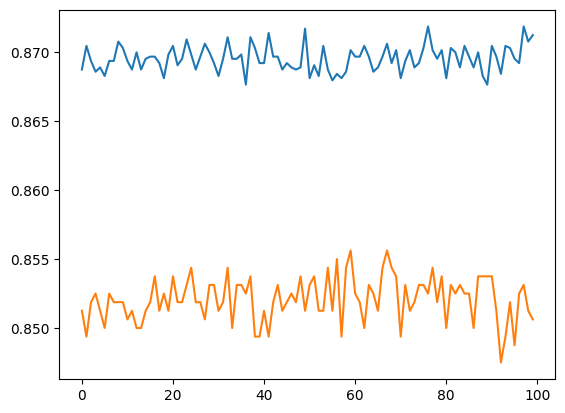

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])